In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#loading data
reviews_train = []
for line in open('gdrive/My Drive/Colab Notebooks/full_train.txt', 'r'):
  reviews_train.append(line.strip())

In [3]:
#for cleaning text
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
  reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
  reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
  return reviews

reviews_train_clean = preprocess_reviews(reviews_train)


#encoding
from sklearn.feature_extraction.text import CountVectorizer
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)

CountVectorizer(binary=True, ngram_range=(1, 2))

In [4]:
#loading already trained classifier
import pickle

classifier_f = open("gdrive/My Drive/Colab Notebooks/goodSentimentClassifier.pickle", "rb")
goodSentimentClassifier = pickle.load(classifier_f)
classifier_f.close()

In [5]:
#for cleaning tweets
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    return tweet

In [6]:
import tweepy

cons_key = 'UHnDs4NWoFC2BqvsyTxiXZ6I1'
cons_secret = 'vZTnAbcIxyZlt4bRBKapNWi7KGsAaCejI08a7IOCbJwGF0Q5NW'

access_token = '766497775760576513-Eaef1z08VQMdsJ4xgxrDSIgd2SCmJpk'
access_token_secret = 'FexRmZC1Tnpv13MH9V5IVTTfcse4Mbxizh33oUJeAYwRt'

auth = tweepy.OAuthHandler(cons_key, cons_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

searchTerm = 'gameofthrones'
noOfSearchTerms = 300

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="en", tweet_mode="extended").items(noOfSearchTerms)

cleanedTweets = []
for tweet in tweets:
  cleaned = clean_tweet(tweet.full_text) 
  print(cleaned)
  cleanedTweets.append(cleaned)
print(len(cleanedTweets))    

Brutally defeated my wife in monopoly like Daenarys massacred Kings Landing 😆 
All I ever wanted was to fight for a lord I believed in But the good lords are dead and the rest are monsters Brienne of Tharth 
 kings and queens take the throne in this mash up The Game of Microphones A2 Print is ava…
Well shit This one hurt Hold the door ❤️ 
 Game of Thrones Ep 3 Lord Snow TOMORROW When all you little WannaBees are rubbing the crusties out of your eyes y…
 While shedding more light on season 4 the Duffer Bros compare the Netflix series to We di…
 NEW EPISODE Best HBO Original Series is out on your podcast platform of choice or link in bio Find out if the panel…
 She beautiful at S6 Premiere April 11 2016 amp aka the Second Daario Naharis…
When your Game of Thrones lingo gets incorporated into your villager chats you know this game is good Whitney calls me Little Dove 🤣 
 We’d say winter is coming but it’s APRIL Thanks so much for your patience we have all hands on deck working to restore 

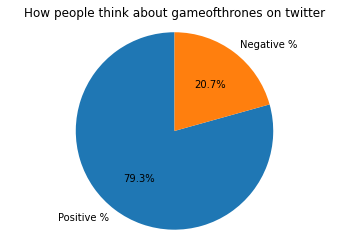

In [7]:
#prediction on tweets
topredict = ngram_vectorizer.transform(cleanedTweets)
prediction = list(goodSentimentClassifier.predict(topredict))

positiveCount = prediction.count(1)
negativeCount = prediction.count(0)


import matplotlib.pyplot as plt

labels = 'Positive %', 'Negative %'

sizes = [positiveCount, negativeCount]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
title = "How people think about " + searchTerm.lstrip("#") + " on twitter"
ax1.set_title(title)

plt.show()